```
---
title: Retrieve reproducible protein-protein interactions from uniprot
tags: SPARQL, UniProt, PPI, reproducibility
lang: en
version: 1.2
date: 2022-12-16
---
```

In [13]:
#import importlib
#import json
#import matplotlib.pyplot as plt
#import os
import pandas
import rdflib
#import rdflib.namespace
import sparqldataframe
from SPARQLWrapper import SPARQLWrapper2, JSON
#import sys

import networkx as nx
import matplotlib.pyplot as plt

In [4]:
#endpointURL = "http://localhost:3030/uniprot/query"
endpointURL = "http://sparql.uniprot.org/sparql"

rdfFormat = "turtle"

In [5]:
prefixes = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs:<http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX dcterms: <http://purl.org/dc/terms/>

PREFIX taxon: <http://purl.uniprot.org/taxonomy/>
PREFIX uniprot: <http://purl.uniprot.org/uniprot/>
PREFIX up:<http://purl.uniprot.org/core/>
"""

# Check that INSR URI is correct

In [4]:
query="""
SELECT ?protein ?proteinLabel ?proteinMnemonic
WHERE {
  # VALUES allows to explicitely assign some value(s) to a variable
  # so in this query, ?protein will always be bound to uniprot:P06213
  # it is convient because
  # - there is a single place ot modify if we decide to look for another protein
  # - we just need to comment the line if we want the query to examine all the proteins
  VALUES ?protein { uniprot:P06213 }

  { ?protein rdfs:label ?proteinLabel . } # rdfsllabel is present in the public UniProt endpoint but not in P06213.ttl
  ?protein up:mnemonic ?proteinMnemonic .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

protein      proteinLabel proteinMnemonic
0  http://purl.uniprot.org/uniprot/P06213  Insulin receptor      INSR_HUMAN

# Retrieve INSR identifier in the Intact database

In [5]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?proteinIntact 
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?proteinIntact owl:sameAs ?protein .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

proteinIntact
0  http://purl.uniprot.org/intact/EBI-475899

# Retrieve the interactions in which INSR participates

In [6]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?proteinIntact ?interaction
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?proteinIntact owl:sameAs ?protein .
  ?interaction up:participant ?proteinIntact .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

proteinIntact  \
0   http://purl.uniprot.org/intact/EBI-475899   
1   http://purl.uniprot.org/intact/EBI-475899   
2   http://purl.uniprot.org/intact/EBI-475899   
3   http://purl.uniprot.org/intact/EBI-475899   
4   http://purl.uniprot.org/intact/EBI-475899   
5   http://purl.uniprot.org/intact/EBI-475899   
6   http://purl.uniprot.org/intact/EBI-475899   
7   http://purl.uniprot.org/intact/EBI-475899   
8   http://purl.uniprot.org/intact/EBI-475899   
9   http://purl.uniprot.org/intact/EBI-475899   
10  http://purl.uniprot.org/intact/EBI-475899   
11  http://purl.uniprot.org/intact/EBI-475899   
12  http://purl.uniprot.org/intact/EBI-475899   
13  http://purl.uniprot.org/intact/EBI-475899   
14  http://purl.uniprot.org/intact/EBI-475899   

                                       interaction  
0    http://purl.uniprot.org/intact/475899-2361824  
1   http://purl.uniprot.org/intact/475899-10698945  
2      http://purl.uniprot.org/intact/80275-475899  
3    http://purl.uniprot.org/intact/475899-7902275  
4     http://purl.uniprot.org/intact/297779-475899  
5     http://purl.uniprot.org/intact/310491-475899  
6    http://purl.uniprot.org/intact/475899-2265659  
7    http://purl.uniprot.org/intact/475899-3989070  
8     http://purl.uniprot.org/intact/475899-517592  
9     http://purl.uniprot.org/intact/475899-520230  
10    http://purl.uniprot.org/intact/475899-948001  
11    http://purl.uniprot.org/intact/475899-968788  
12     http://purl.uniprot.org/intact/78835-475899  
13     http://purl.uniprot.org/intact/79387-475899  
14     http://purl.uniprot.org/intact/79464-475899

# Retrieve the number of experiments supporting each interaction

In [7]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?proteinIntact ?interaction ?nbExperiments
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?proteinIntact owl:sameAs ?protein .
  ?interaction up:participant ?proteinIntact .
  ?interaction up:experiments ?nbExperiments .
}
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

proteinIntact  \
0   http://purl.uniprot.org/intact/EBI-475899   
1   http://purl.uniprot.org/intact/EBI-475899   
2   http://purl.uniprot.org/intact/EBI-475899   
3   http://purl.uniprot.org/intact/EBI-475899   
4   http://purl.uniprot.org/intact/EBI-475899   
5   http://purl.uniprot.org/intact/EBI-475899   
6   http://purl.uniprot.org/intact/EBI-475899   
7   http://purl.uniprot.org/intact/EBI-475899   
8   http://purl.uniprot.org/intact/EBI-475899   
9   http://purl.uniprot.org/intact/EBI-475899   
10  http://purl.uniprot.org/intact/EBI-475899   
11  http://purl.uniprot.org/intact/EBI-475899   
12  http://purl.uniprot.org/intact/EBI-475899   
13  http://purl.uniprot.org/intact/EBI-475899   
14  http://purl.uniprot.org/intact/EBI-475899   

                                       interaction nbExperiments  
0    http://purl.uniprot.org/intact/475899-2361824             2  
1   http://purl.uniprot.org/intact/475899-10698945             2  
2      http://purl.uniprot.org/intact/80275-475899             3  
3    http://purl.uniprot.org/intact/475899-7902275             4  
4     http://purl.uniprot.org/intact/297779-475899             2  
5     http://purl.uniprot.org/intact/310491-475899             6  
6    http://purl.uniprot.org/intact/475899-2265659             2  
7    http://purl.uniprot.org/intact/475899-3989070             5  
8     http://purl.uniprot.org/intact/475899-517592             3  
9     http://purl.uniprot.org/intact/475899-520230             5  
10    http://purl.uniprot.org/intact/475899-948001             3  
11    http://purl.uniprot.org/intact/475899-968788            32  
12     http://purl.uniprot.org/intact/78835-475899             2  
13     http://purl.uniprot.org/intact/79387-475899             9  
14     http://purl.uniprot.org/intact/79464-475899             3

In [8]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?proteinIntact ?interaction ?nbExperiments
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?proteinIntact owl:sameAs ?protein .
  ?interaction up:participant ?proteinIntact .
  ?interaction up:experiments ?nbExperiments .
}
ORDER BY DESC(?nbExperiments)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

proteinIntact  \
0   http://purl.uniprot.org/intact/EBI-475899   
1   http://purl.uniprot.org/intact/EBI-475899   
2   http://purl.uniprot.org/intact/EBI-475899   
3   http://purl.uniprot.org/intact/EBI-475899   
4   http://purl.uniprot.org/intact/EBI-475899   
5   http://purl.uniprot.org/intact/EBI-475899   
6   http://purl.uniprot.org/intact/EBI-475899   
7   http://purl.uniprot.org/intact/EBI-475899   
8   http://purl.uniprot.org/intact/EBI-475899   
9   http://purl.uniprot.org/intact/EBI-475899   
10  http://purl.uniprot.org/intact/EBI-475899   
11  http://purl.uniprot.org/intact/EBI-475899   
12  http://purl.uniprot.org/intact/EBI-475899   
13  http://purl.uniprot.org/intact/EBI-475899   
14  http://purl.uniprot.org/intact/EBI-475899   

                                       interaction nbExperiments  
0     http://purl.uniprot.org/intact/475899-968788            32  
1      http://purl.uniprot.org/intact/79387-475899             9  
2     http://purl.uniprot.org/intact/310491-475899             6  
3    http://purl.uniprot.org/intact/475899-3989070             5  
4     http://purl.uniprot.org/intact/475899-520230             5  
5    http://purl.uniprot.org/intact/475899-7902275             4  
6      http://purl.uniprot.org/intact/80275-475899             3  
7     http://purl.uniprot.org/intact/475899-517592             3  
8     http://purl.uniprot.org/intact/475899-948001             3  
9      http://purl.uniprot.org/intact/79464-475899             3  
10   http://purl.uniprot.org/intact/475899-2361824             2  
11  http://purl.uniprot.org/intact/475899-10698945             2  
12    http://purl.uniprot.org/intact/297779-475899             2  
13   http://purl.uniprot.org/intact/475899-2265659             2  
14     http://purl.uniprot.org/intact/78835-475899             2

# For each interaction, retrieve the other protein (may require some additional filtering to avoid duplicates) and its UniProt identifier

In [9]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?proteinIntact ?interaction ?nbExperiments ?interactingProteinIntact
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?proteinIntact owl:sameAs ?protein .
  ?interaction up:participant ?proteinIntact .
  ?interaction up:experiments ?nbExperiments .
  ?interaction up:participant ?interactingProteinIntact .
}
ORDER BY DESC(?nbExperiments)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

proteinIntact  \
0   http://purl.uniprot.org/intact/EBI-475899   
1   http://purl.uniprot.org/intact/EBI-475899   
2   http://purl.uniprot.org/intact/EBI-475899   
3   http://purl.uniprot.org/intact/EBI-475899   
4   http://purl.uniprot.org/intact/EBI-475899   
5   http://purl.uniprot.org/intact/EBI-475899   
6   http://purl.uniprot.org/intact/EBI-475899   
7   http://purl.uniprot.org/intact/EBI-475899   
8   http://purl.uniprot.org/intact/EBI-475899   
9   http://purl.uniprot.org/intact/EBI-475899   
10  http://purl.uniprot.org/intact/EBI-475899   
11  http://purl.uniprot.org/intact/EBI-475899   
12  http://purl.uniprot.org/intact/EBI-475899   
13  http://purl.uniprot.org/intact/EBI-475899   
14  http://purl.uniprot.org/intact/EBI-475899   
15  http://purl.uniprot.org/intact/EBI-475899   
16  http://purl.uniprot.org/intact/EBI-475899   
17  http://purl.uniprot.org/intact/EBI-475899   
18  http://purl.uniprot.org/intact/EBI-475899   
19  http://purl.uniprot.org/intact/EBI-475899   
20  http://purl.uniprot.org/intact/EBI-475899   
21  http://purl.uniprot.org/intact/EBI-475899   
22  http://purl.uniprot.org/intact/EBI-475899   
23  http://purl.uniprot.org/intact/EBI-475899   
24  http://purl.uniprot.org/intact/EBI-475899   
25  http://purl.uniprot.org/intact/EBI-475899   
26  http://purl.uniprot.org/intact/EBI-475899   
27  http://purl.uniprot.org/intact/EBI-475899   
28  http://purl.uniprot.org/intact/EBI-475899   
29  http://purl.uniprot.org/intact/EBI-475899   

                                       interaction nbExperiments  \
0     http://purl.uniprot.org/intact/475899-968788            32   
1     http://purl.uniprot.org/intact/475899-968788            32   
2      http://purl.uniprot.org/intact/79387-475899             9   
3      http://purl.uniprot.org/intact/79387-475899             9   
4     http://purl.uniprot.org/intact/310491-475899             6   
5     http://purl.uniprot.org/intact/310491-475899             6   
6    http://purl.uniprot.org/intact/475899-3989070             5   
7    http://purl.uniprot.org/intact/475899-3989070             5   
8     http://purl.uniprot.org/intact/475899-520230             5   
9     http://purl.uniprot.org/intact/475899-520230             5   
10   http://purl.uniprot.org/intact/475899-7902275             4   
11   http://purl.uniprot.org/intact/475899-7902275             4   
12     http://purl.uniprot.org/intact/80275-475899             3   
13     http://purl.uniprot.org/intact/80275-475899             3   
14    http://purl.uniprot.org/intact/475899-517592             3   
15    http://purl.uniprot.org/intact/475899-517592             3   
16    http://purl.uniprot.org/intact/475899-948001             3   
17    http://purl.uniprot.org/intact/475899-948001             3   
18     http://purl.uniprot.org/intact/79464-475899             3   
19     http://purl.uniprot.org/intact/79464-475899             3   
20   http://purl.uniprot.org/intact/475899-2361824             2   
21   http://purl.uniprot.org/intact/475899-2361824             2   
22  http://purl.uniprot.org/intact/475899-10698945             2   
23  http://purl.uniprot.org/intact/475899-10698945             2   
24    http://purl.uniprot.org/intact/297779-475899             2   
25    http://purl.uniprot.org/intact/297779-475899             2   
26   http://purl.uniprot.org/intact/475899-2265659             2   
27   http://purl.uniprot.org/intact/475899-2265659             2   
28     http://purl.uniprot.org/intact/78835-475899             2   
29     http://purl.uniprot.org/intact/78835-475899             2   

                       interactingProteinIntact  
0     http://purl.uniprot.org/intact/EBI-475899  
1     http://purl.uniprot.org/intact/EBI-968788  
2      http://purl.uniprot.org/intact/EBI-79387  
3     http://purl.uniprot.org/intact/EBI-475899  
4     http://purl.uniprot.org/intact/EBI-310491  
5     http://purl.uniprot.org/intact/EBI-475899  
6    http://purl.uniprot.org/intact/EBI-3989070  
7  

In [10]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?proteinIntact ?interaction ?nbExperiments ?interactingProteinIntact
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?proteinIntact owl:sameAs ?protein .
  ?interaction up:participant ?proteinIntact .
  ?interaction up:experiments ?nbExperiments .
  ?interaction up:participant ?interactingProteinIntact .
  FILTER ( ?interactingProteinIntact !=  ?proteinIntact)
}
ORDER BY DESC(?nbExperiments)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

proteinIntact  \
0   http://purl.uniprot.org/intact/EBI-475899   
1   http://purl.uniprot.org/intact/EBI-475899   
2   http://purl.uniprot.org/intact/EBI-475899   
3   http://purl.uniprot.org/intact/EBI-475899   
4   http://purl.uniprot.org/intact/EBI-475899   
5   http://purl.uniprot.org/intact/EBI-475899   
6   http://purl.uniprot.org/intact/EBI-475899   
7   http://purl.uniprot.org/intact/EBI-475899   
8   http://purl.uniprot.org/intact/EBI-475899   
9   http://purl.uniprot.org/intact/EBI-475899   
10  http://purl.uniprot.org/intact/EBI-475899   
11  http://purl.uniprot.org/intact/EBI-475899   
12  http://purl.uniprot.org/intact/EBI-475899   
13  http://purl.uniprot.org/intact/EBI-475899   
14  http://purl.uniprot.org/intact/EBI-475899   

                                       interaction nbExperiments  \
0     http://purl.uniprot.org/intact/475899-968788            32   
1      http://purl.uniprot.org/intact/79387-475899             9   
2     http://purl.uniprot.org/intact/310491-475899             6   
3    http://purl.uniprot.org/intact/475899-3989070             5   
4     http://purl.uniprot.org/intact/475899-520230             5   
5    http://purl.uniprot.org/intact/475899-7902275             4   
6      http://purl.uniprot.org/intact/80275-475899             3   
7     http://purl.uniprot.org/intact/475899-517592             3   
8     http://purl.uniprot.org/intact/475899-948001             3   
9      http://purl.uniprot.org/intact/79464-475899             3   
10   http://purl.uniprot.org/intact/475899-2361824             2   
11  http://purl.uniprot.org/intact/475899-10698945             2   
12    http://purl.uniprot.org/intact/297779-475899             2   
13   http://purl.uniprot.org/intact/475899-2265659             2   
14     http://purl.uniprot.org/intact/78835-475899             2   

                       interactingProteinIntact  
0     http://purl.uniprot.org/intact/EBI-968788  
1      http://purl.uniprot.org/intact/EBI-79387  
2     http://purl.uniprot.org/intact/EBI-310491  
3    http://purl.uniprot.org/intact/EBI-3989070  
4     http://purl.uniprot.org/intact/EBI-520230  
5    http://purl.uniprot.org/intact/EBI-7902275  
6      http://purl.uniprot.org/intact/EBI-80275  
7     http://purl.uniprot.org/intact/EBI-517592  
8     http://purl.uniprot.org/intact/EBI-948001  
9      http://purl.uniprot.org/intact/EBI-79464  
10   http://purl.uniprot.org/intact/EBI-2361824  
11  http://purl.uniprot.org/intact/EBI-10698945  
12    http://purl.uniprot.org/intact/EBI-297779  
13   http://purl.uniprot.org/intact/EBI-2265659  
14     http://purl.uniprot.org/intact/EBI-78835

In [11]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?proteinIntact ?interaction ?nbExperiments ?interactingProteinIntact ?interactingProtein
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?proteinIntact owl:sameAs ?protein .
  ?interaction up:participant ?proteinIntact .
  ?interaction up:experiments ?nbExperiments .
  ?interaction up:participant ?interactingProteinIntact .
  FILTER ( ?interactingProteinIntact !=  ?proteinIntact) .
  ?interactingProteinIntact owl:sameAs ?interactingProtein .
}
ORDER BY DESC(?nbExperiments)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

proteinIntact  \
0   http://purl.uniprot.org/intact/EBI-475899   
1   http://purl.uniprot.org/intact/EBI-475899   
2   http://purl.uniprot.org/intact/EBI-475899   
3   http://purl.uniprot.org/intact/EBI-475899   
4   http://purl.uniprot.org/intact/EBI-475899   
5   http://purl.uniprot.org/intact/EBI-475899   
6   http://purl.uniprot.org/intact/EBI-475899   
7   http://purl.uniprot.org/intact/EBI-475899   
8   http://purl.uniprot.org/intact/EBI-475899   
9   http://purl.uniprot.org/intact/EBI-475899   
10  http://purl.uniprot.org/intact/EBI-475899   
11  http://purl.uniprot.org/intact/EBI-475899   
12  http://purl.uniprot.org/intact/EBI-475899   
13  http://purl.uniprot.org/intact/EBI-475899   
14  http://purl.uniprot.org/intact/EBI-475899   

                                       interaction nbExperiments  \
0     http://purl.uniprot.org/intact/475899-968788            32   
1      http://purl.uniprot.org/intact/79387-475899             9   
2     http://purl.uniprot.org/intact/310491-475899             6   
3     http://purl.uniprot.org/intact/475899-520230             5   
4    http://purl.uniprot.org/intact/475899-3989070             5   
5    http://purl.uniprot.org/intact/475899-7902275             4   
6     http://purl.uniprot.org/intact/475899-517592             3   
7     http://purl.uniprot.org/intact/475899-948001             3   
8      http://purl.uniprot.org/intact/79464-475899             3   
9      http://purl.uniprot.org/intact/80275-475899             3   
10   http://purl.uniprot.org/intact/475899-2361824             2   
11     http://purl.uniprot.org/intact/78835-475899             2   
12    http://purl.uniprot.org/intact/297779-475899             2   
13   http://purl.uniprot.org/intact/475899-2265659             2   
14  http://purl.uniprot.org/intact/475899-10698945             2   

                       interactingProteinIntact  \
0     http://purl.uniprot.org/intact/EBI-968788   
1      http://purl.uniprot.org/intact/EBI-79387   
2     http://purl.uniprot.org/intact/EBI-310491   
3     http://purl.uniprot.org/intact/EBI-520230   
4    http://purl.uniprot.org/intact/EBI-3989070   
5    http://purl.uniprot.org/intact/EBI-7902275   
6     http://purl.uniprot.org/intact/EBI-517592   
7     http://purl.uniprot.org/intact/EBI-948001   
8      http://purl.uniprot.org/intact/EBI-79464   
9      http://purl.uniprot.org/intact/EBI-80275   
10   http://purl.uniprot.org/intact/EBI-2361824   
11     http://purl.uniprot.org/intact/EBI-78835   
12    http://purl.uniprot.org/intact/EBI-297779   
13   http://purl.uniprot.org/intact/EBI-2265659   
14  http://purl.uniprot.org/intact/EBI-10698945   

                        interactingProtein  
0   http://purl.uniprot.org/uniprot/P18031  
1   http://purl.uniprot.org/uniprot/P19174  
2   http://purl.uniprot.org/uniprot/Q9NRF2  
3   http://purl.uniprot.org/uniprot/P35570  
4   http://purl.uniprot.org/uniprot/P01317  
5   http://purl.uniprot.org/uniprot/P05019  
6   http://purl.uniprot.org/uniprot/P35568  
7   http://purl.uniprot.org/uniprot/Q15323  
8   http://purl.uniprot.org/uniprot/P27986  
9   http://purl.uniprot.org/uniprot/Q13322  
10  http://purl.uniprot.org/uniprot/Q99490  
11  http://purl.uniprot.org/uniprot/P29353  
12  http://purl.uniprot.org/uniprot/Q06124  
13  http://purl.uniprot.org/uniprot/Q15256  
14  http://purl.uniprot.org/uniprot/Q8NEJ0

In [12]:
query="""
# Retrieve all the resources that are equivalent to uniprot:P06213

SELECT ?protein ?proteinMnemonic ?nbExperiments ?interactingProtein ?interactingProteinMnemonic
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?protein up:mnemonic ?proteinMnemonic .
  ?proteinIntact owl:sameAs ?protein .
  ?interaction up:participant ?proteinIntact .
  ?interaction up:experiments ?nbExperiments .
  ?interaction up:participant ?interactingProteinIntact .
  FILTER ( ?interactingProteinIntact !=  ?proteinIntact) .
  ?interactingProteinIntact owl:sameAs ?interactingProtein .
  ?interactingProtein up:mnemonic ?interactingProteinMnemonic .
}
ORDER BY DESC(?nbExperiments)
"""

df = sparqldataframe.query(endpointURL, prefixes+query)
df

protein proteinMnemonic nbExperiments  \
0   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN            32   
1   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             9   
2   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             6   
3   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             5   
4   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             5   
5   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             4   
6   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             3   
7   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             3   
8   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             3   
9   http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             3   
10  http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             2   
11  http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             2   
12  http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             2   
13  http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             2   
14  http://purl.uniprot.org/uniprot/P06213      INSR_HUMAN             2   

                        interactingProtein interactingProteinMnemonic  
0   http://purl.uniprot.org/uniprot/P18031                 PTN1_HUMAN  
1   http://purl.uniprot.org/uniprot/P19174                PLCG1_HUMAN  
2   http://purl.uniprot.org/uniprot/Q9NRF2                SH2B1_HUMAN  
3   http://purl.uniprot.org/uniprot/P01317                  INS_BOVIN  
4   http://purl.uniprot.org/uniprot/P35570                   IRS1_RAT  
5   http://purl.uniprot.org/uniprot/P05019                 IGF1_HUMAN  
6   http://purl.uniprot.org/uniprot/Q15323                 K1H1_HUMAN  
7   http://purl.uniprot.org/uniprot/P27986                 P85A_HUMAN  
8   http://purl.uniprot.org/uniprot/Q13322                GRB10_HUMAN  
9   http://purl.uniprot.org/uniprot/P35568                 IRS1_HUMAN  
10  http://purl.uniprot.org/uniprot/P29353                 SHC1_HUMAN  
11  http://purl.uniprot.org/uniprot/Q8NEJ0                DUS18_HUMAN  
12  http://purl.uniprot.org/uniprot/Q06124                PTN11_HUMAN  
13  http://purl.uniprot.org/uniprot/Q15256                PTPRR_HUMAN  
14  http://purl.uniprot.org/uniprot/Q99490                AGAP2_HUMAN

# Export the interaction graph

## Export as a graph

In [11]:
G = nx.Graph()

In [16]:
query = """
SELECT DISTINCT ?protein ?proteinMnemonic ?proteinTaxon ?otherProtein ?otherProteinMnemonic ?nbExperiments
WHERE {
  VALUES ?protein { uniprot:P06213 }

  {
    ?protein up:interaction ?interaction .
    ?interaction rdf:type up:Non_Self_Interaction .
    ?otherProtein up:interaction ?interaction .
    FILTER (?protein != ?otherProtein)
    ?interaction up:experiments ?nbExperiments .
  }
  UNION
  {
    ?protein up:interaction ?interaction .
    ?interaction rdf:type up:Self_Interaction .
    ?otherProtein up:interaction ?interaction .
    FILTER (?protein = ?otherProtein)
    ?interaction up:experiments ?nbExperiments .
  }

  ?protein up:mnemonic ?proteinMnemonic .
  ?protein up:organism ?proteinTaxon .
  ?otherProtein up:mnemonic ?otherProteinMnemonic .
  ?otherProtein up:organism ?proteinTaxon . # we force ?protein and ?otherProtein 
}
ORDER BY ?proteinMnemonic ?otherProteinMnemonic 
"""

sparql = SPARQLWrapper2(endpointURL)
sparql.setReturnFormat(JSON)

sparql.setQuery(prefixes + query)

for result in sparql.query().bindings:
    print(f"{result['proteinMnemonic'].value}, {result['otherProteinMnemonic'].value}")
    G.add_edge(result['proteinMnemonic'].value, result['otherProteinMnemonic'].value, nbExperiments=result['nbExperiments'].value)

INSR_HUMAN, AGAP2_HUMAN
INSR_HUMAN, ARRB2_HUMAN
INSR_HUMAN, ASM3B_HUMAN
INSR_HUMAN, DUS18_HUMAN
INSR_HUMAN, GRB10_HUMAN
INSR_HUMAN, IGF1R_HUMAN
INSR_HUMAN, IGF1_HUMAN
INSR_HUMAN, INSRR_HUMAN
INSR_HUMAN, INSR_HUMAN
INSR_HUMAN, INS_HUMAN
INSR_HUMAN, IRS1_HUMAN
INSR_HUMAN, K1H1_HUMAN
INSR_HUMAN, MD2L1_HUMAN
INSR_HUMAN, P85A_HUMAN
INSR_HUMAN, PLCG1_HUMAN
INSR_HUMAN, PTN11_HUMAN
INSR_HUMAN, PTN1_HUMAN
INSR_HUMAN, PTN1_HUMAN
INSR_HUMAN, PTPRR_HUMAN
INSR_HUMAN, SH2B1_HUMAN
INSR_HUMAN, SHC1_HUMAN


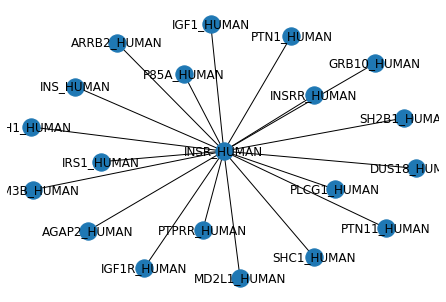

In [17]:
nx.draw(G, with_labels=True)
plt.show()

In [23]:
query = """
SELECT DISTINCT ?protein ?proteinMnemonic ?proteinTaxon ?otherProtein ?otherProteinMnemonic ?otherProtein2 ?otherProtein2Mnemonic ?nbExperiments
WHERE {
  VALUES ?protein { uniprot:P06213 }

  ?protein up:interaction ?interaction .
  ?interaction rdf:type up:Non_Self_Interaction .
  ?otherProtein up:interaction ?interaction .
  FILTER (?protein != ?otherProtein)
  #?interaction up:experiments ?nbExperiments .
  
  ?protein up:interaction ?interaction2 .
  ?interaction2 rdf:type up:Non_Self_Interaction .
  ?otherProtein2 up:interaction ?interaction2 .
  FILTER (?protein != ?otherProtein2)
  #?interaction2 up:experiments ?nbExperiments .
  
  ?otherProtein up:interaction ?crossInteraction .
  ?otherProtein2 up:interaction ?crossInteraction .
  ?crossInteraction rdf:type up:Non_Self_Interaction .
  FILTER (?otherProtein > ?otherProtein2)
  ?crossInteraction up:experiments ?nbExperiments .

  ?protein up:mnemonic ?proteinMnemonic .
  ?protein up:organism ?proteinTaxon .
  ?otherProtein up:mnemonic ?otherProteinMnemonic .
  ?otherProtein up:organism ?proteinTaxon . 
  ?otherProtein2 up:mnemonic ?otherProtein2Mnemonic .
  ?otherProtein2 up:organism ?proteinTaxon .  
}
ORDER BY ?proteinMnemonic ?otherProteinMnemonic 
"""

sparql = SPARQLWrapper2(endpointURL)
sparql.setReturnFormat(JSON)

sparql.setQuery(prefixes + query)

for result in sparql.query().bindings:
    print(f"{result['otherProteinMnemonic'].value}, {result['otherProtein2Mnemonic'].value}")
    G.add_edge(result['otherProteinMnemonic'].value, result['otherProtein2Mnemonic'].value, nbExperiments=result['nbExperiments'].value)

GRB10_HUMAN, P85A_HUMAN
IGF1R_HUMAN, P85A_HUMAN
IGF1_HUMAN, IGF1R_HUMAN
IRS1_HUMAN, P85A_HUMAN
IRS1_HUMAN, P85A_HUMAN
IRS1_HUMAN, PTN11_HUMAN
PTN11_HUMAN, IGF1R_HUMAN
PTN1_HUMAN, IGF1R_HUMAN
SHC1_HUMAN, IGF1R_HUMAN


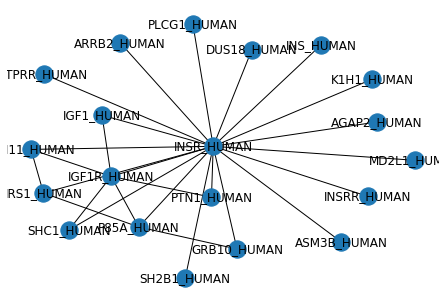

In [22]:
nx.draw(G, with_labels=True)
plt.show()

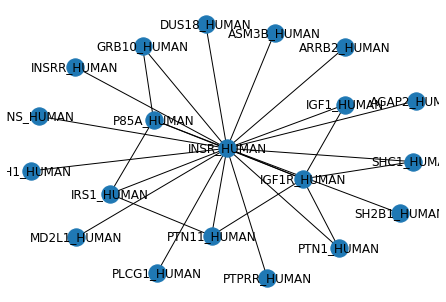

In [30]:
#nx.draw_spring(G, with_labels=True)
nx.draw_kamada_kawai(G, with_labels=True)
#nx.draw_spectral(G, with_labels=True)
#nx.draw_planar(G, with_labels=True)

plt.show()